A team of plantation planners are concerned about the yield of oil palm trees, which seems to
fluctuate. They have collected a set of data and needed help in analysing on how external
factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of
oil palm tree determines the FFB yield, and are linked to the external factors. Perform the
analysis, which requires some study on the background of oil palm tree physiology.

Analysis:
    
We performed the descriptive analysis to check how the external factors influence on FFB yield. As per the scatter and density plot, we can see that precepitation, soilmoisture, average temp, max temp shows the strong normal distributions. However, to find the strong correlation beween two variables which can be identified through the correlation coefficient.


Outcomes:

As per the scatter and density plot, we can see precepitation, soilmoisture, average temp, max temp have more effect on FFB yield. The same has been shown in the correlation matrix. 



Loading dependencies

In [1]:
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

Read dataset and check if there is null values

In [2]:
df=pd.read_csv("C:/Users/mypratik/Desktop/PreScreen_r3/palm_ffb.csv")

In [3]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [4]:
df.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

As per above, there is no missig values in the dataset

Visualize the data

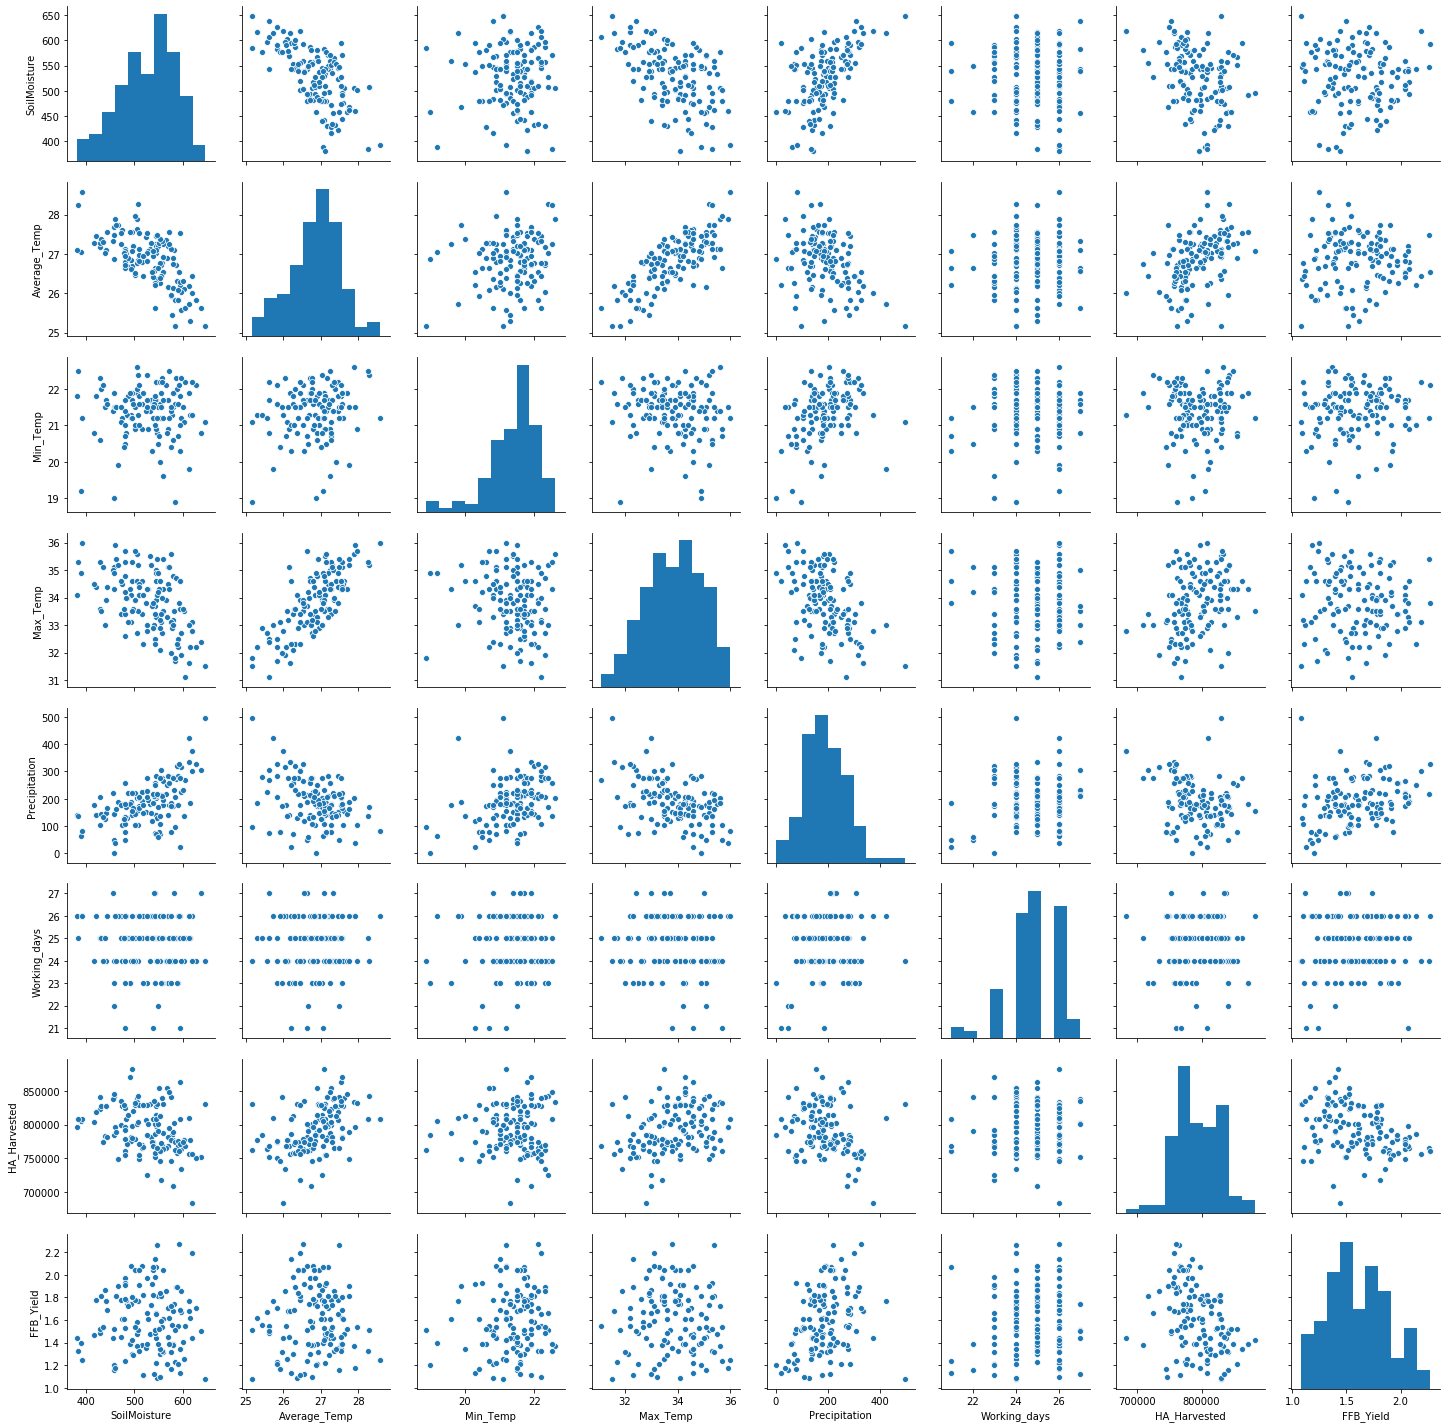

In [5]:
sns.pairplot(df)

As per the above visualization, we can see some storog co-relation between variables. Let's check the scatter and density plot and see the co-relation co-efficient of incredients given in the dataset in detail.

In [6]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.4, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

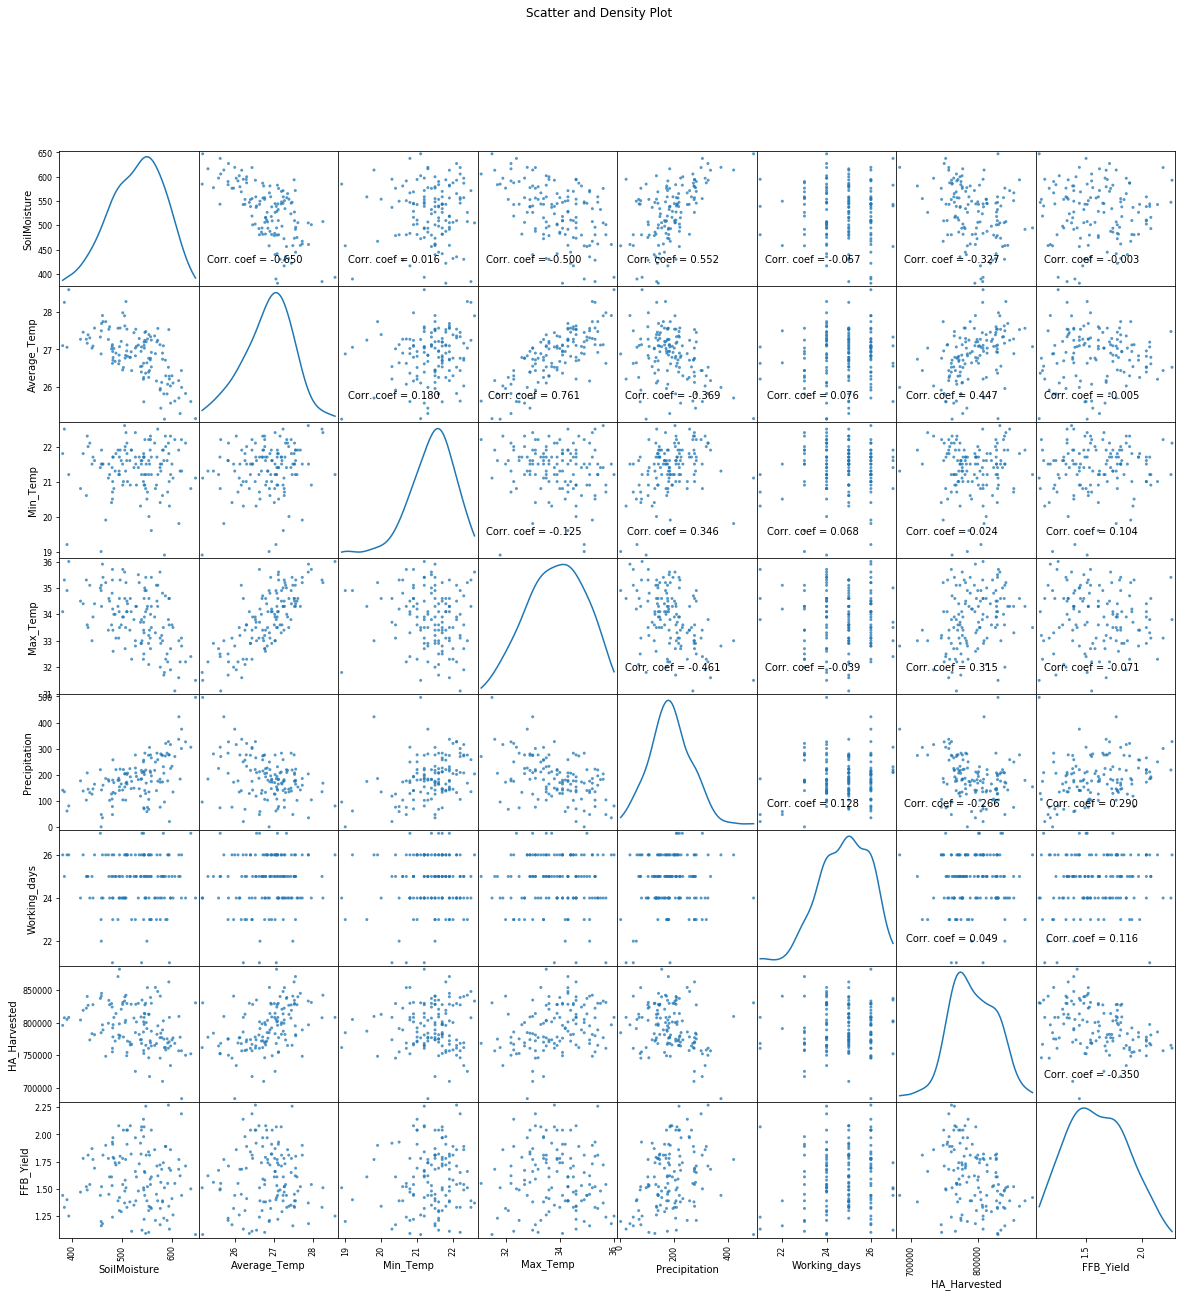

In [7]:
plotScatterMatrix(df, 20, 10)

As per the scatter and density plot, we can see precepitation, soilmoisture, average temp, max temp have more effect on FFB yield. Let's see the visualization as a correlation matrix.

In [8]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

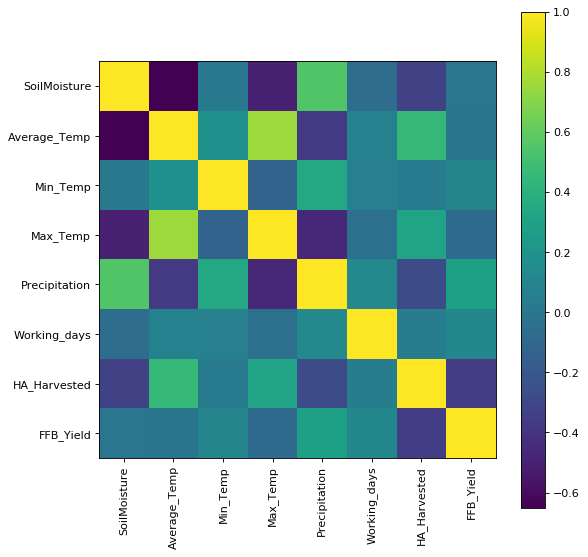

In [9]:
plotCorrelationMatrix(df, 8)